# Panan0025 bottom properties

Code to compare bottom and shelf properties between panan resolutions and between OM2 and panan

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client


In [2]:
client = Client(n_workers=336)

In [3]:
session_panan_dir= '/home/156/wf4500/databases/access/panan.db'
Panan_session = cc.database.create_session(session_panan_dir)
base_session = cc.database.create_session() 
DSW_session=cc.database.create_session('/home/156/wf4500/databases/access/DSW.db') 

Importing T,S,sob,tob

In [4]:
%%time
start_time='1999-01-01'
end_time='1999-12-31'
lat_slice  = slice(-83,-59)

temp_01 = cc.querying.getvar('panant-01-zstar-ACCESSyr2', 'thetao', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
temp_01 = temp_01.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
temp_01 = temp_01.mean('time')


temp_005 = cc.querying.getvar('panant-005-zstar-ACCESSyr2', 'thetao', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
temp_005 = temp_005.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
temp_005 = temp_005.mean('time')

temp_0025 = cc.querying.getvar('panant-0025-zstar-ACCESSyr2', 'thetao', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
temp_0025 = temp_0025.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
temp_0025 = temp_0025.mean('time')

temp_OM2 = cc.querying.getvar('01deg_jra55v13_ryf9091', 'temp', base_session, frequency='1 monthly',start_time=start_time, end_time=end_time) - 273.15
temp_OM2 = temp_OM2.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)
temp_OM2 = temp_OM2.mean('time')


CPU times: user 51.8 s, sys: 54 s, total: 1min 45s
Wall time: 1min 45s


The below step is done much later for other simulations, but since panan002 is so heavy, we will run rhis first while the memory is empty

In [5]:
%%time
# Topography for panan0025:

depthfile_0025='/home/156/wf4500/x77_wf4500/ASC_project/model_data/Panan_Maxdepth/HT_0025.nc'
# Depthfile for panan0025 was previously created using the code on:
#  "/home/156/wf4500/x77_wf4500/ASC_project/GH/ASC_SpatialTemporalVariability/Python/HT_0025.py"

ht_0025=xr.open_dataset(depthfile_0025); 
ht_0025=ht_0025.__xarray_dataarray_variable__

land_mask_0025 = np.squeeze(ht_0025.values)*0
land_mask_0025[np.isnan(land_mask_0025)] = 1
land_mask_0025 = np.where(land_mask_0025==1,land_mask_0025,np.nan)
land_mask_masked_0025 = np.ma.masked_where((land_mask_0025==0),land_mask_0025)
# make land go all the way to -90S:
land_mask_lat_0025 = ht_0025.yh.values
land_mask_lat_0025[0] = -90

CPU times: user 3.46 s, sys: 2.56 s, total: 6.01 s
Wall time: 4.49 s


In [6]:
%%time
start_time='1999-01-01'
end_time='1999-12-31'
lat_slice  = slice(-83,-59)

salt_01 = cc.querying.getvar('panant-01-zstar-ACCESSyr2', 'so', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
salt_01 = salt_01.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
salt_01 = salt_01.mean('time')


salt_005 = cc.querying.getvar('panant-005-zstar-ACCESSyr2', 'so', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
salt_005 = salt_005.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
salt_005 = salt_005.mean('time')

salt_0025 = cc.querying.getvar('panant-0025-zstar-ACCESSyr2', 'so', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
salt_0025 = salt_0025.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
salt_0025 = salt_0025.mean('time')

salt_OM2 = cc.querying.getvar('01deg_jra55v13_ryf9091', 'salt', base_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
salt_OM2 = salt_OM2.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)
salt_OM2 = salt_OM2.mean('time')



CPU times: user 45.5 s, sys: 48.9 s, total: 1min 34s
Wall time: 1min 34s


In [7]:
%%time
start_time='1999-01-01'
end_time='1999-12-31'
lat_slice  = slice(-83,-59)

tob_01 = cc.querying.getvar('panant-01-zstar-ACCESSyr2', 'tob', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
tob_01 = tob_01.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
tob_01 = tob_01.mean('time')


tob_005 = cc.querying.getvar('panant-005-zstar-ACCESSyr2', 'tob', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
tob_005 = tob_005.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
tob_005 = tob_005.mean('time')

tob_0025 = cc.querying.getvar('panant-0025-zstar-ACCESSyr2', 'tob', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
tob_0025 = tob_0025.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
tob_0025 = tob_0025.mean('time')

sob_01 = cc.querying.getvar('panant-01-zstar-ACCESSyr2', 'sob', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
sob_01 = sob_01.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
sob_01 = sob_01.mean('time')


sob_005 = cc.querying.getvar('panant-005-zstar-ACCESSyr2', 'sob', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
sob_005 = sob_005.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
sob_005 = sob_005.mean('time')

sob_0025 = cc.querying.getvar('panant-0025-zstar-ACCESSyr2', 'sob', Panan_session, frequency='1 monthly',start_time=start_time, end_time=end_time) 
sob_0025 = sob_0025.sel(time=slice(start_time,end_time)).sel(yh=lat_slice)
sob_0025 = sob_0025.mean('time')

CPU times: user 1min 6s, sys: 1min 13s, total: 2min 19s
Wall time: 2min 19s


For OM2-01 I need to get the temperature in the bottom (not automatically saved)

In [8]:
depth_array = temp_OM2 * 0 + temp_OM2.st_ocean
max_depth = depth_array.max(dim = 'st_ocean', skipna= True)
tob_OM2 = temp_OM2.where(depth_array.st_ocean >= max_depth)
tob_OM2 = tob_OM2.sum(dim = 'st_ocean')


depth_array = salt_OM2 * 0 + salt_OM2.st_ocean
max_depth = depth_array.max(dim = 'st_ocean', skipna= True)
sob_OM2 = salt_OM2.where(depth_array.st_ocean >= max_depth)
sob_OM2 = sob_OM2.sum(dim = 'st_ocean')

In [9]:
# this is actually ASBW despite the naming:
filepath = '/g/data/v45/rm2389/Schmidtko_Observations/AASW_Temp_Salt.nc'
Schmidtko_data = xr.open_dataset(filepath)
temp_Schmidtko = Schmidtko_data.CT
salt_Schmidtko = Schmidtko_data.AS

# concat observations onto model grid.
x = temp_Schmidtko.lon.values
x[x> 80] = x[x>80]-360
# replace lon coordinate values with these modified longitude values
temp_Schmidtko['lon'] = x
salt_Schmidtko['lon'] = x
# now concatenate temp and salinity so that it goes from -280 to 80 like access
temp_Schmidtko = xr.concat((temp_Schmidtko[:,321:], temp_Schmidtko[:,:321]), dim='lon')
salt_Schmidtko = xr.concat((salt_Schmidtko[:,321:], salt_Schmidtko[:,:321]), dim='lon')

Loading topography for plotting the landin simulations

In [10]:
# Topography for om2:
ht_OM2 = cc.querying.getvar('01deg_jra55v13_ryf9091','ht' , base_session,n=1).sel(yt_ocean=lat_slice)
land_mask_OM2 = np.squeeze(ht_OM2.values)*0
land_mask_OM2[np.isnan(land_mask_OM2)] = 1
land_mask_OM2 = np.where(land_mask_OM2==1,land_mask_OM2,np.nan)
land_mask_masked_OM2 = np.ma.masked_where((land_mask_OM2==0),land_mask_OM2)
# make land go all the way to -90S:
land_mask_lat_OM2 = ht_OM2.yt_ocean.values
land_mask_lat_OM2[0] = -90



In [11]:
# Topography for panan01:
depth_array_01 = temp_01 * 0 + temp_01.z_l
ht_01 = depth_array_01.max(dim = 'z_l', skipna= True)

land_mask_01 = np.squeeze(ht_01.values)*0
land_mask_01[np.isnan(land_mask_01)] = 1
land_mask_01 = np.where(land_mask_01==1,land_mask_01,np.nan)
land_mask_masked_01 = np.ma.masked_where((land_mask_01==0),land_mask_01)
# make land go all the way to -90S:
land_mask_lat_01 = ht_01.yh.values
land_mask_lat_01[0] = -90

In [12]:
%%time
# # Topography for panan005:
# depth_array_005 = temp_005 * 0 + temp_005.z_l
# ht_005 = depth_array_005.max(dim = 'z_l', skipna= True)
depthfile_005='/home/156/wf4500/x77_wf4500/ASC_project/model_data/Panan_Maxdepth/HT_005.nc'
ht_005=xr.open_dataset(depthfile_005); 
ht_005=ht_005.__xarray_dataarray_variable__

land_mask_005 = np.squeeze(ht_005.values)*0
land_mask_005[np.isnan(land_mask_005)] = 1
land_mask_005 = np.where(land_mask_005==1,land_mask_005,np.nan)
land_mask_masked_005 = np.ma.masked_where((land_mask_005==0),land_mask_005)
# make land go all the way to -90S:
land_mask_lat_005 = ht_005.yh.values
land_mask_lat_005[0] = -90



CPU times: user 219 ms, sys: 324 ms, total: 543 ms
Wall time: 377 ms


In [13]:
# interpolate obs onto OM2 model grid:
def interp_obs(obs,model_lat,model_lon): 
    obs_new = obs.interp(lat = model_lat, lon = model_lon)
    return obs_new

temp_Schmidtko_OM2 = interp_obs(temp_Schmidtko,temp_OM2.yt_ocean,temp_OM2.xt_ocean)
salt_Schmidtko_OM2 = interp_obs(salt_Schmidtko,temp_OM2.yt_ocean,temp_OM2.xt_ocean)

In [14]:
# interpolate obs onto panan01:
temp_Schmidtko_01 = interp_obs(temp_Schmidtko,temp_01.yh,temp_01.xh)
salt_Schmidtko_01 = interp_obs(salt_Schmidtko,temp_01.yh,temp_01.xh)

In [15]:
# interpolate obs onto panan005:
temp_Schmidtko_005 = interp_obs(temp_Schmidtko,temp_005.yh,temp_005.xh)
salt_Schmidtko_005 = interp_obs(salt_Schmidtko,temp_005.yh,temp_005.xh)

In [16]:
# interpolate obs onto panan005:
temp_Schmidtko_0025 = interp_obs(temp_Schmidtko,temp_0025.yh,temp_0025.xh)
salt_Schmidtko_0025 = interp_obs(salt_Schmidtko,temp_0025.yh,temp_0025.xh)

loading everything now

In [17]:
%%time
tob_OM2=tob_OM2.load()
tob_01=tob_01.load()
tob_005=tob_005.load()
tob_0025=tob_0025.load()

sob_OM2=sob_OM2.load()
sob_01=sob_01.load()
sob_005=sob_005.load()
sob_0025=sob_0025.load()


temp_Schmidtko_01.load()
salt_Schmidtko_01.load()
temp_Schmidtko_005.load()
salt_Schmidtko_005.load()
temp_Schmidtko_0025.load()
salt_Schmidtko_0025.load()

CPU times: user 11min 19s, sys: 10min 48s, total: 22min 7s
Wall time: 22min 20s


<xarray.DataArray 'AS' (yh: 2038, xh: 14400)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lat      (yh) float64 -81.09 -81.08 -81.07 -81.06 ... -59.03 -59.01 -59.0
    lon      (xh) float64 -280.0 -280.0 -279.9 -279.9 ... 79.94 79.96 79.99
  * yh       (yh) float64 -81.09 -81.08 -81.07 -81.06 ... -59.03 -59.01 -59.0
  * xh       (xh) float64 -280.0 -280.0 -279.9 -279.9 ... 79.94 79.96 79.99

In [18]:
#Setting for all plots
fontsize=15
ht_0025=ht_0025.isel(time=0)

In [19]:
# # compared to Schmidtko:

# scale_max = 1
# fontsize=18

# fig  = plt.figure(1, figsize = (25,12))
# norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# # OM2 - Obs
# # setup stereo projection:
# ax = fig.add_axes([0.0, 0.0, 0.22, 1],projection=ccrs.SouthPolarStereo())
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)
# # plot:
# cf = ax.pcolormesh(tob_OM2.xt_ocean, tob_OM2.yt_ocean, tob_OM2-temp_Schmidtko_OM2, norm = norm, 
#                    cmap = cmocean.balance, transform = ccrs.PlateCarree())
# ax.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
# plt.title('OM2',fontsize=fontsize)
# ax.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
#              zorder=2,transform = ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# # panan01 - Obs
# # setup stereo projection:
# ax = fig.add_axes([0.23, 0.0, 0.22, 1],projection=ccrs.SouthPolarStereo())
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)
# # plot:
# cf = ax.pcolormesh(tob_01.xh, tob_01.yh, tob_01-temp_Schmidtko_01, norm = norm, 
#                    cmap = cmocean.balance, transform = ccrs.PlateCarree())
# ax.contour(ht_01.xh,ht_01.yh,ht_01,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
# plt.title('Panan-01',fontsize=fontsize)
# ax.contourf(ht_01.xh, land_mask_lat_01,land_mask_masked_01,colors='darkgrey',
#              zorder=2,transform = ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())







# # panan005 - Obs
# # setup stereo projection:
# ax = fig.add_axes([0.46, 0.0, 0.22, 1],projection=ccrs.SouthPolarStereo())
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)
# # plot:
# cf = ax.pcolormesh(tob_005.xh, tob_005.yh, tob_005-temp_Schmidtko_005, norm = norm, 
#                    cmap = cmocean.balance, transform = ccrs.PlateCarree())
# ax.contour(ht_005.xh,ht_005.yh,ht_005,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
# plt.title('Panan-005',fontsize=fontsize)
# ax.contourf(ht_005.xh, land_mask_lat_005,land_mask_masked_005,colors='darkgrey',
#              zorder=2,transform = ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# # panan0025 - Obs
# # setup stereo projection:
# ax = fig.add_axes([0.69, 0.0, 0.22, 1],projection=ccrs.SouthPolarStereo())
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)
# ax.set_boundary(circle, transform=ax.transAxes)
# # plot:
# cf = ax.pcolormesh(tob_0025.xh, tob_0025.yh, tob_0025-temp_Schmidtko_0025, norm = norm, 
#                    cmap = cmocean.balance, transform = ccrs.PlateCarree())
# ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
# plt.title('Panan-0025',fontsize=fontsize)
# ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
#              zorder=2,transform = ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# # colorbar:
# cbaxes = fig.add_axes([0.93, 0.25, 0.010, 0.5])
# cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
# cbar.set_label(r'Bottom temperature anomaly from Schmidtko ($^\circ$C)',fontsize=fontsize,labelpad=2)
# cbar.ax.tick_params(labelsize=fontsize)

In [20]:
figpath='/home/156/wf4500/x77_wf4500/ASC_project/analysis_figs/'

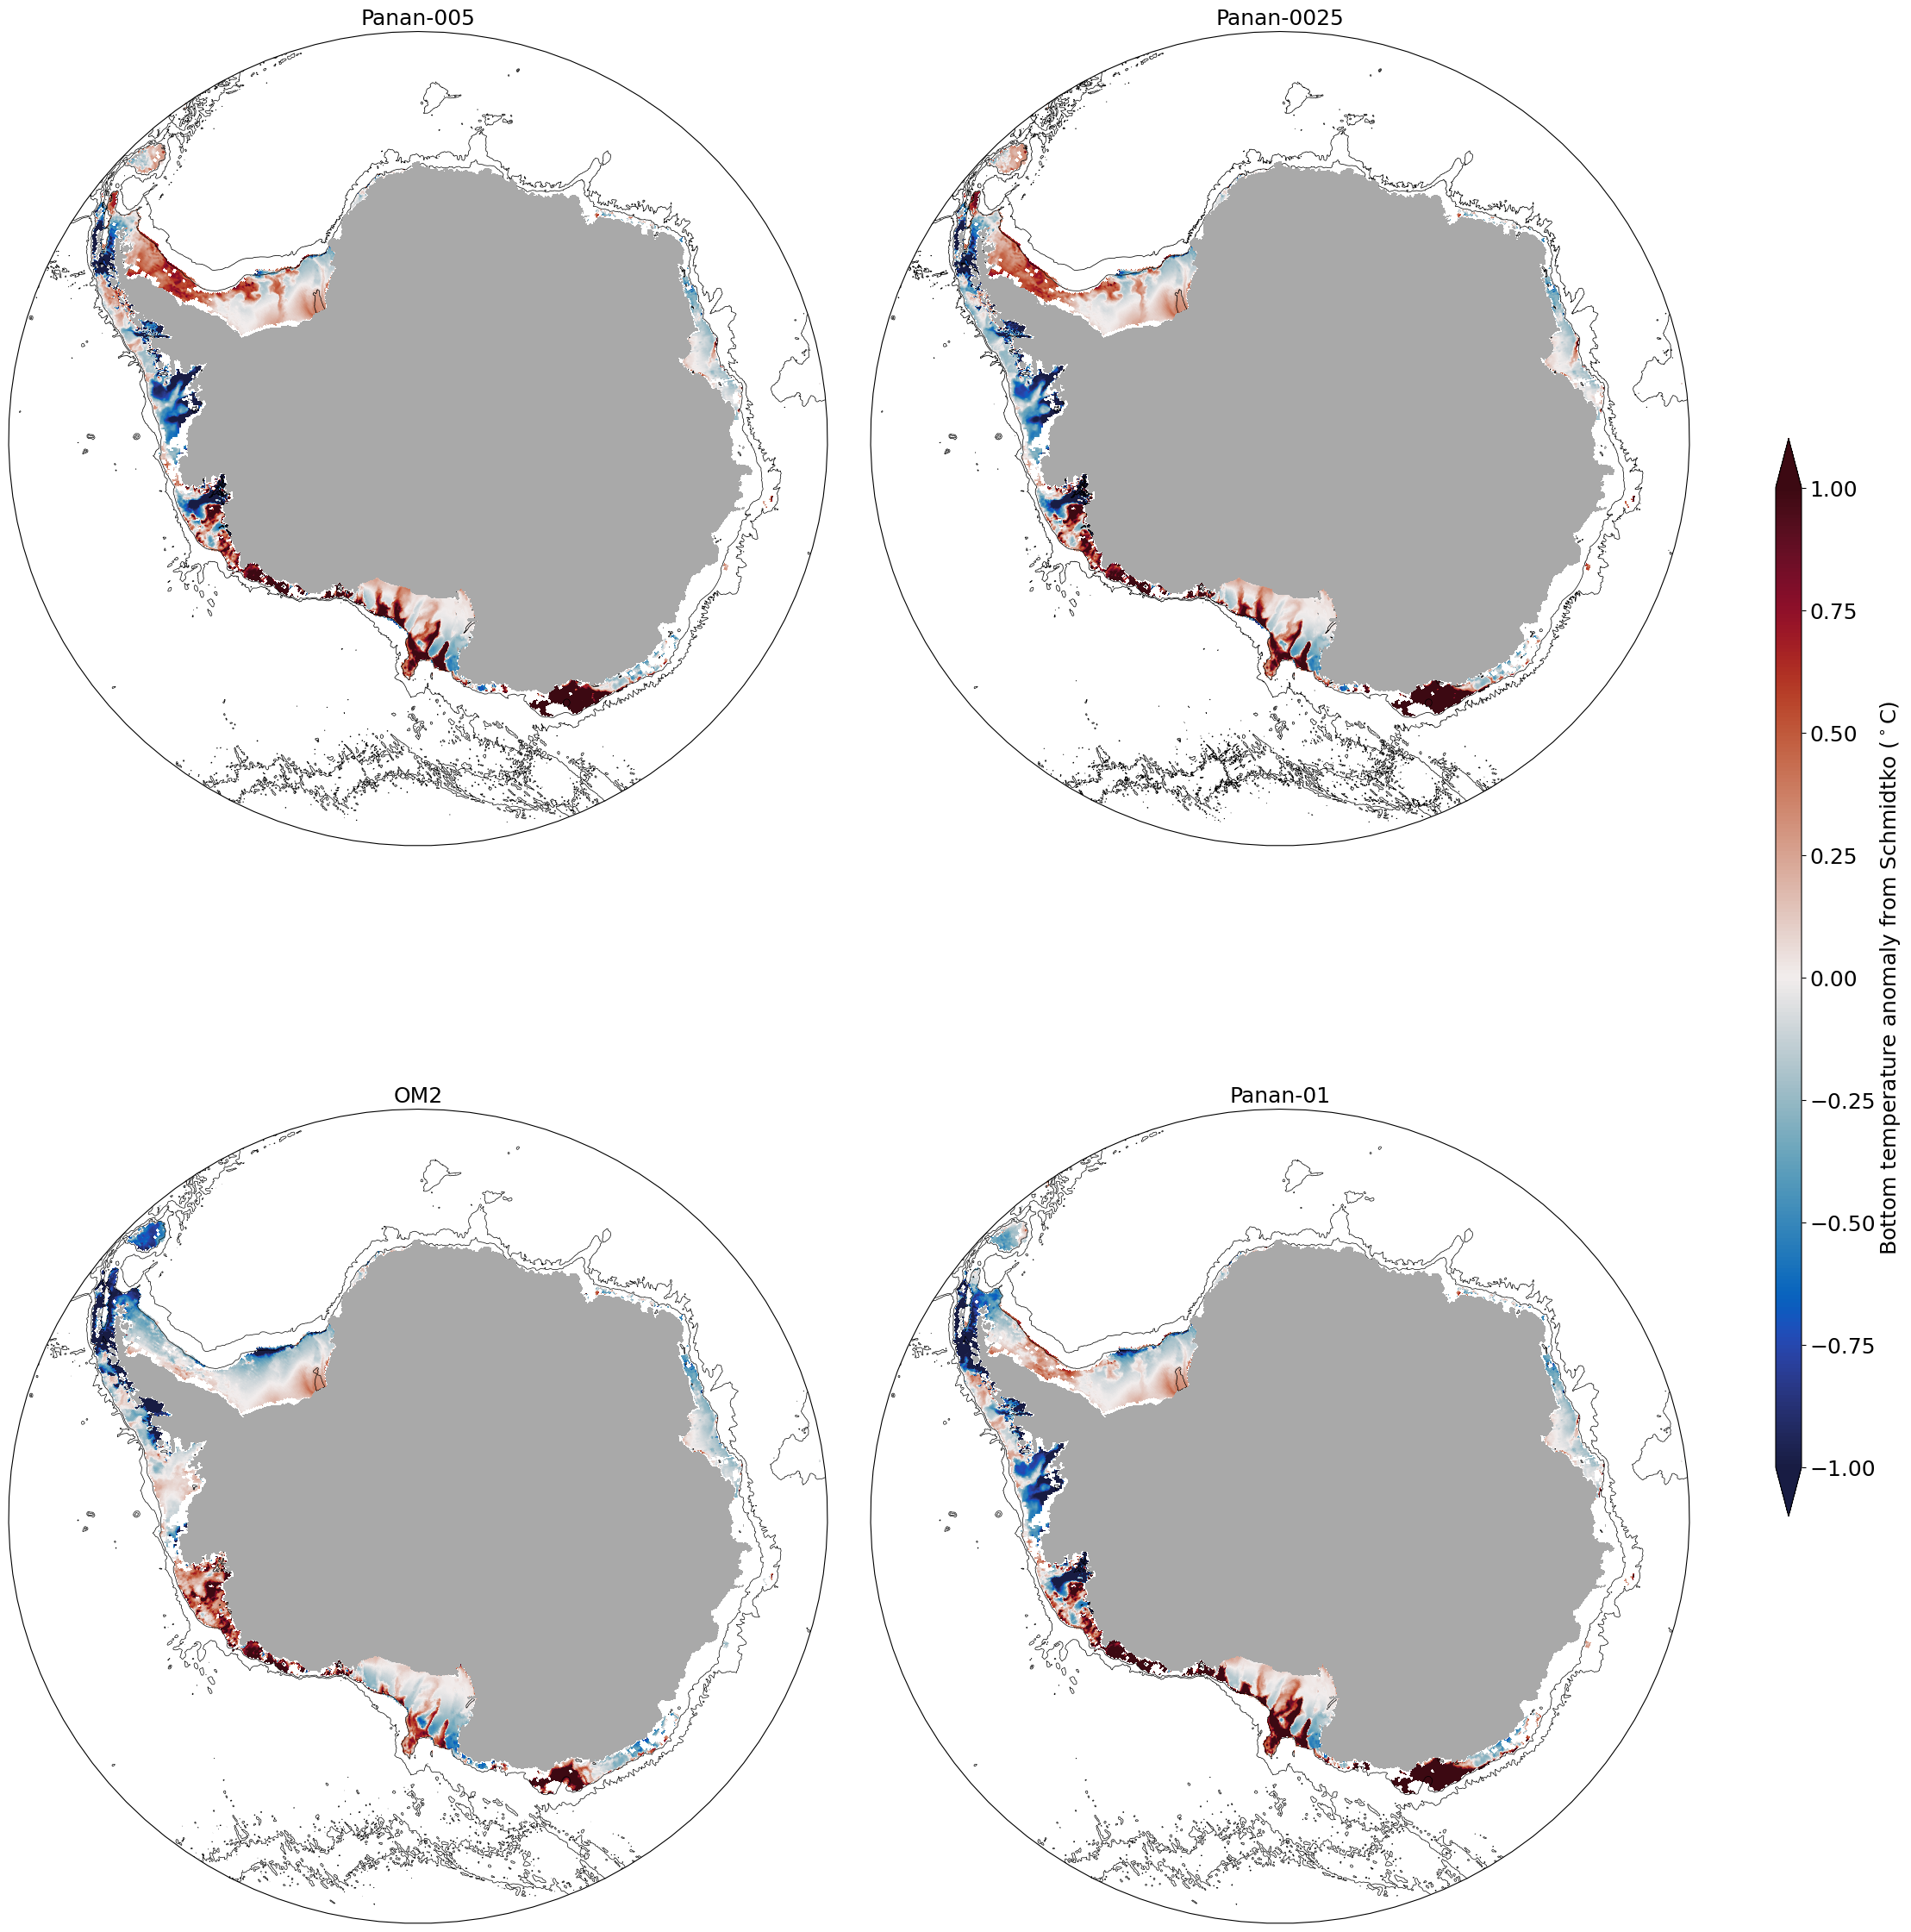

In [21]:
# Bottom temperature comparisson  to Schmidtko:

scale_max = 1
fontsize=18

fig  = plt.figure(1, figsize = (25,25))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# OM2 - Obs
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_OM2.xt_ocean, tob_OM2.yt_ocean, tob_OM2-temp_Schmidtko_OM2, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('OM2',fontsize=fontsize)
ax.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# panan01 - Obs
# setup stereo projection:
ax = fig.add_axes([0.4, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_01.xh, tob_01.yh, tob_01-temp_Schmidtko_01, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_01.xh,ht_01.yh,ht_01,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-01',fontsize=fontsize)
ax.contourf(ht_01.xh, land_mask_lat_01,land_mask_masked_01,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())







# panan005 - Obs
# setup stereo projection:
ax = fig.add_axes([0, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_005.xh, tob_005.yh, tob_005-temp_Schmidtko_005, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_005.xh,ht_005.yh,ht_005,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-005',fontsize=fontsize)
ax.contourf(ht_005.xh, land_mask_lat_005,land_mask_masked_005,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# panan0025 - Obs
# setup stereo projection:
ax = fig.add_axes([0.4, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_0025.xh, tob_0025.yh, tob_0025-temp_Schmidtko_0025, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-0025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# colorbar:
cbaxes = fig.add_axes([0.82, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom temperature anomaly from Schmidtko ($^\circ$C)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

plt.savefig(figpath+'Panan_bottomT_anomalies.png',dpi=300)

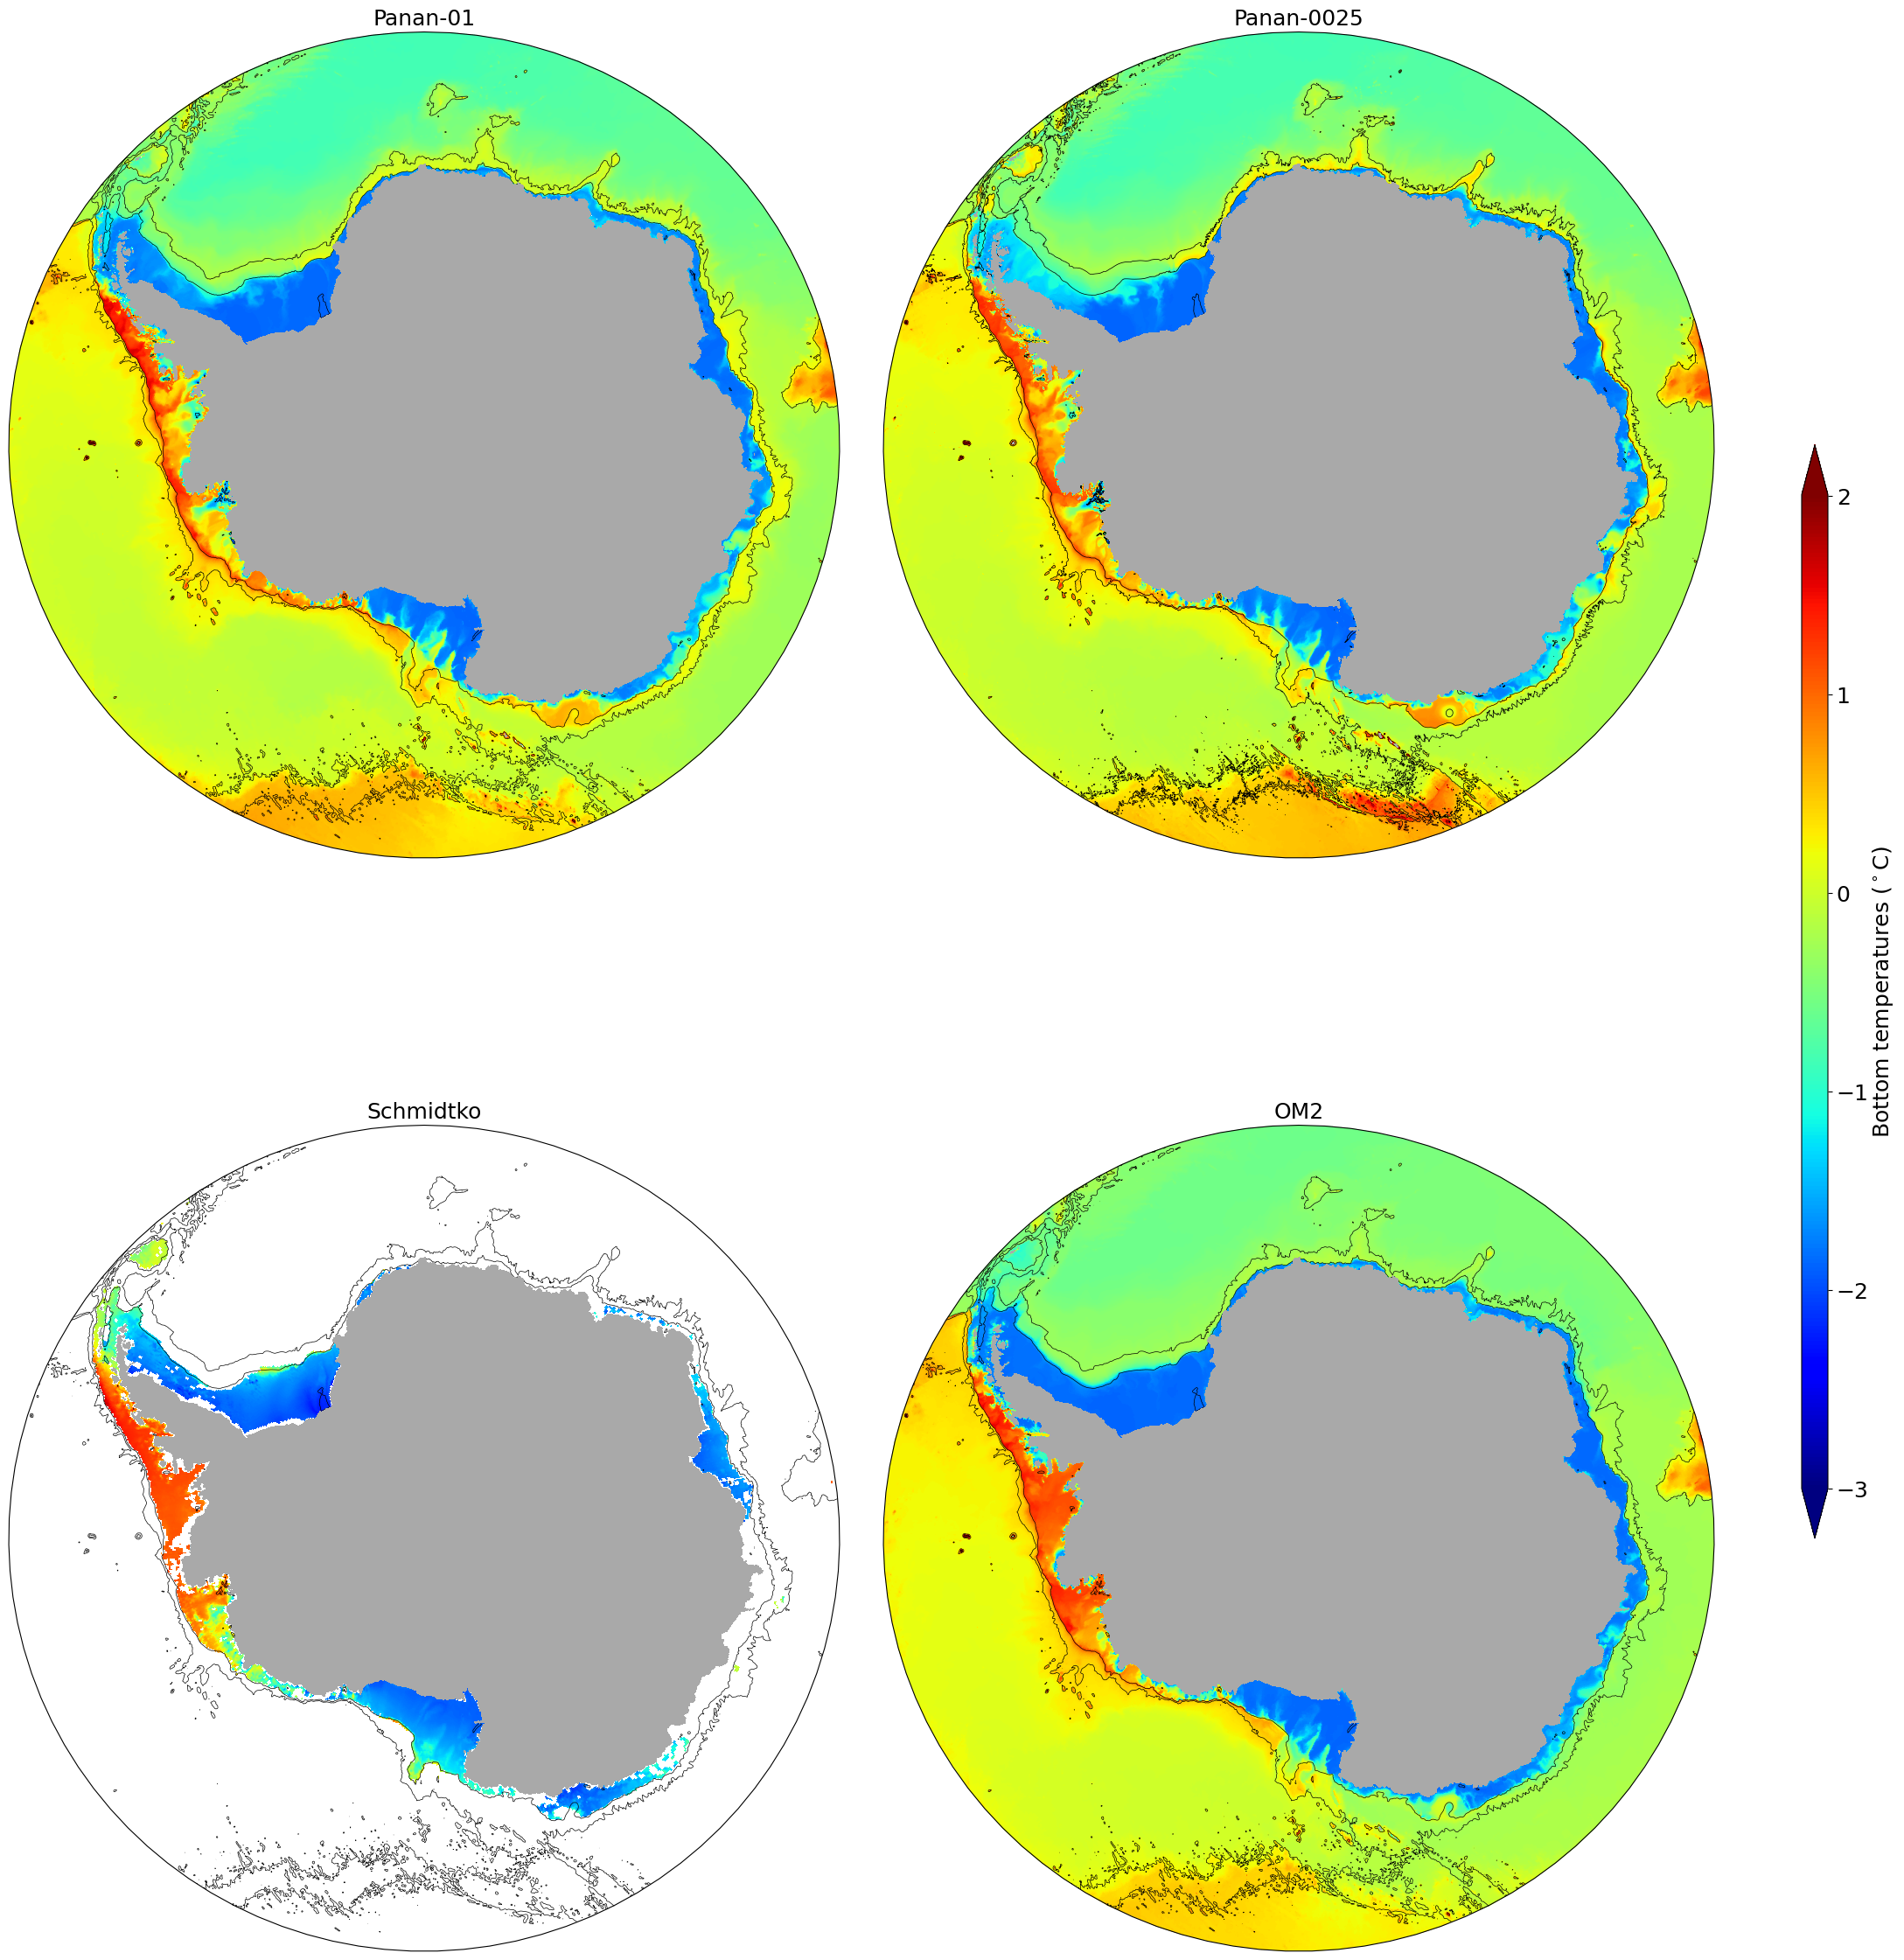

In [22]:
# Actual temperatures  to Schmidtko:

scale_max = 1
fontsize=18
#levels=np.arange(-3,2.005,.05)


fig  = plt.figure(1, figsize = (25,25))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Obs
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_OM2.xt_ocean, tob_OM2.yt_ocean, temp_Schmidtko_OM2, vmin=-3,vmax=2.005,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Schmidtko',fontsize=fontsize)
ax.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())




# OM2
ax = fig.add_axes([0.4, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_OM2.xt_ocean, tob_OM2.yt_ocean, tob_OM2, vmin=-3,vmax=2.005,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('OM2',fontsize=fontsize)
ax.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())




# panan01
ax = fig.add_axes([0, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_01.xh, tob_01.yh, tob_01, vmin=-3,vmax=2.005,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_01.xh,ht_01.yh,ht_01,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-01',fontsize=fontsize)
ax.contourf(ht_01.xh, land_mask_lat_01,land_mask_masked_01,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())





# panan0025
ax = fig.add_axes([0.4, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_0025.xh, tob_0025.yh, tob_0025, vmin=-3,vmax=2.005,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-0025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# colorbar:
cbaxes = fig.add_axes([0.82, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom temperatures ($^\circ$C)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

plt.savefig(figpath+'Panan_bottomT.png',dpi=300)

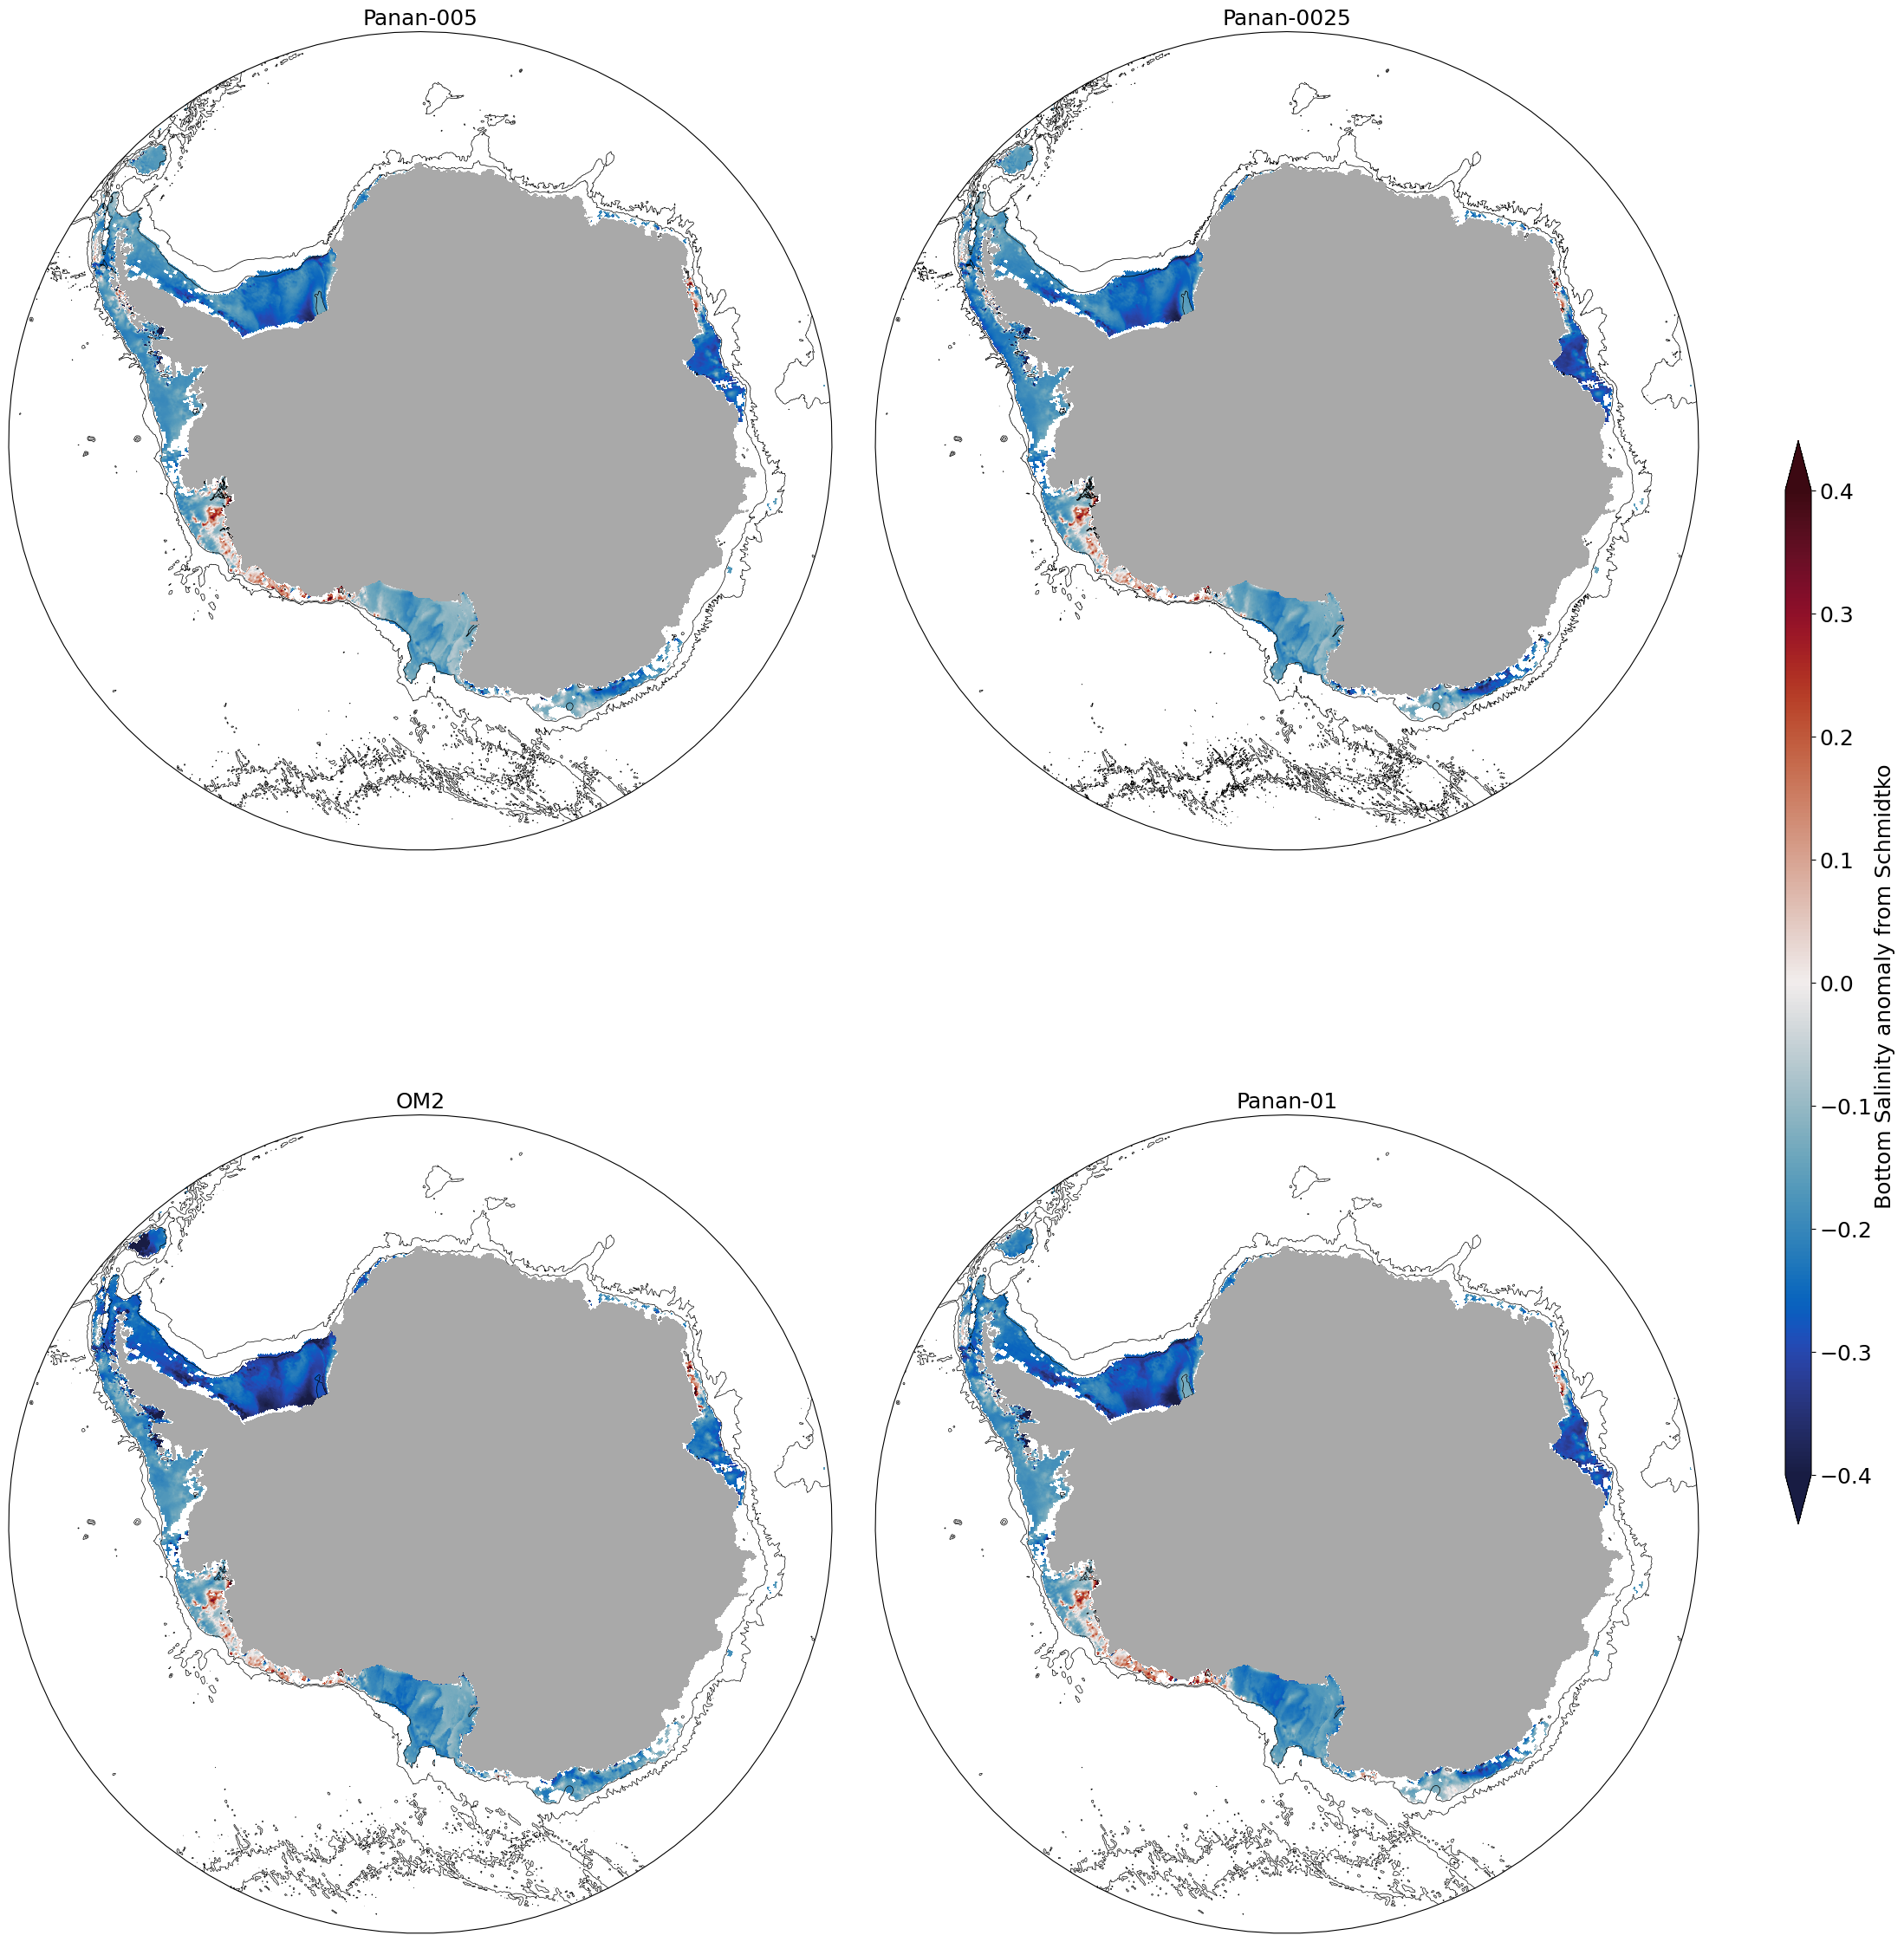

In [23]:
# Bottom Salinity comparisson  to Schmidtko:

scale_max = 0.4
fontsize=18

fig  = plt.figure(1, figsize = (25,25))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# OM2 - Obs
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_OM2.xt_ocean, sob_OM2.yt_ocean, sob_OM2-salt_Schmidtko_OM2, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('OM2',fontsize=fontsize)
ax.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# panan01 - Obs
# setup stereo projection:
ax = fig.add_axes([0.4, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_01.xh, sob_01.yh, sob_01-salt_Schmidtko_01, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_01.xh,ht_01.yh,ht_01,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-01',fontsize=fontsize)
ax.contourf(ht_01.xh, land_mask_lat_01,land_mask_masked_01,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())







# panan005 - Obs
# setup stereo projection:
ax = fig.add_axes([0, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_005.xh, sob_005.yh, sob_005-salt_Schmidtko_005, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_005.xh,ht_005.yh,ht_005,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-005',fontsize=fontsize)
ax.contourf(ht_005.xh, land_mask_lat_005,land_mask_masked_005,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# panan0025 - Obs
# setup stereo projection:
ax = fig.add_axes([0.4, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_0025.xh, sob_0025.yh, sob_0025-salt_Schmidtko_0025, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-0025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# colorbar:
cbaxes = fig.add_axes([0.82, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom Salinity anomaly from Schmidtko ',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

plt.savefig(figpath+'Panan_bottomS_anomalies.png',dpi=300)

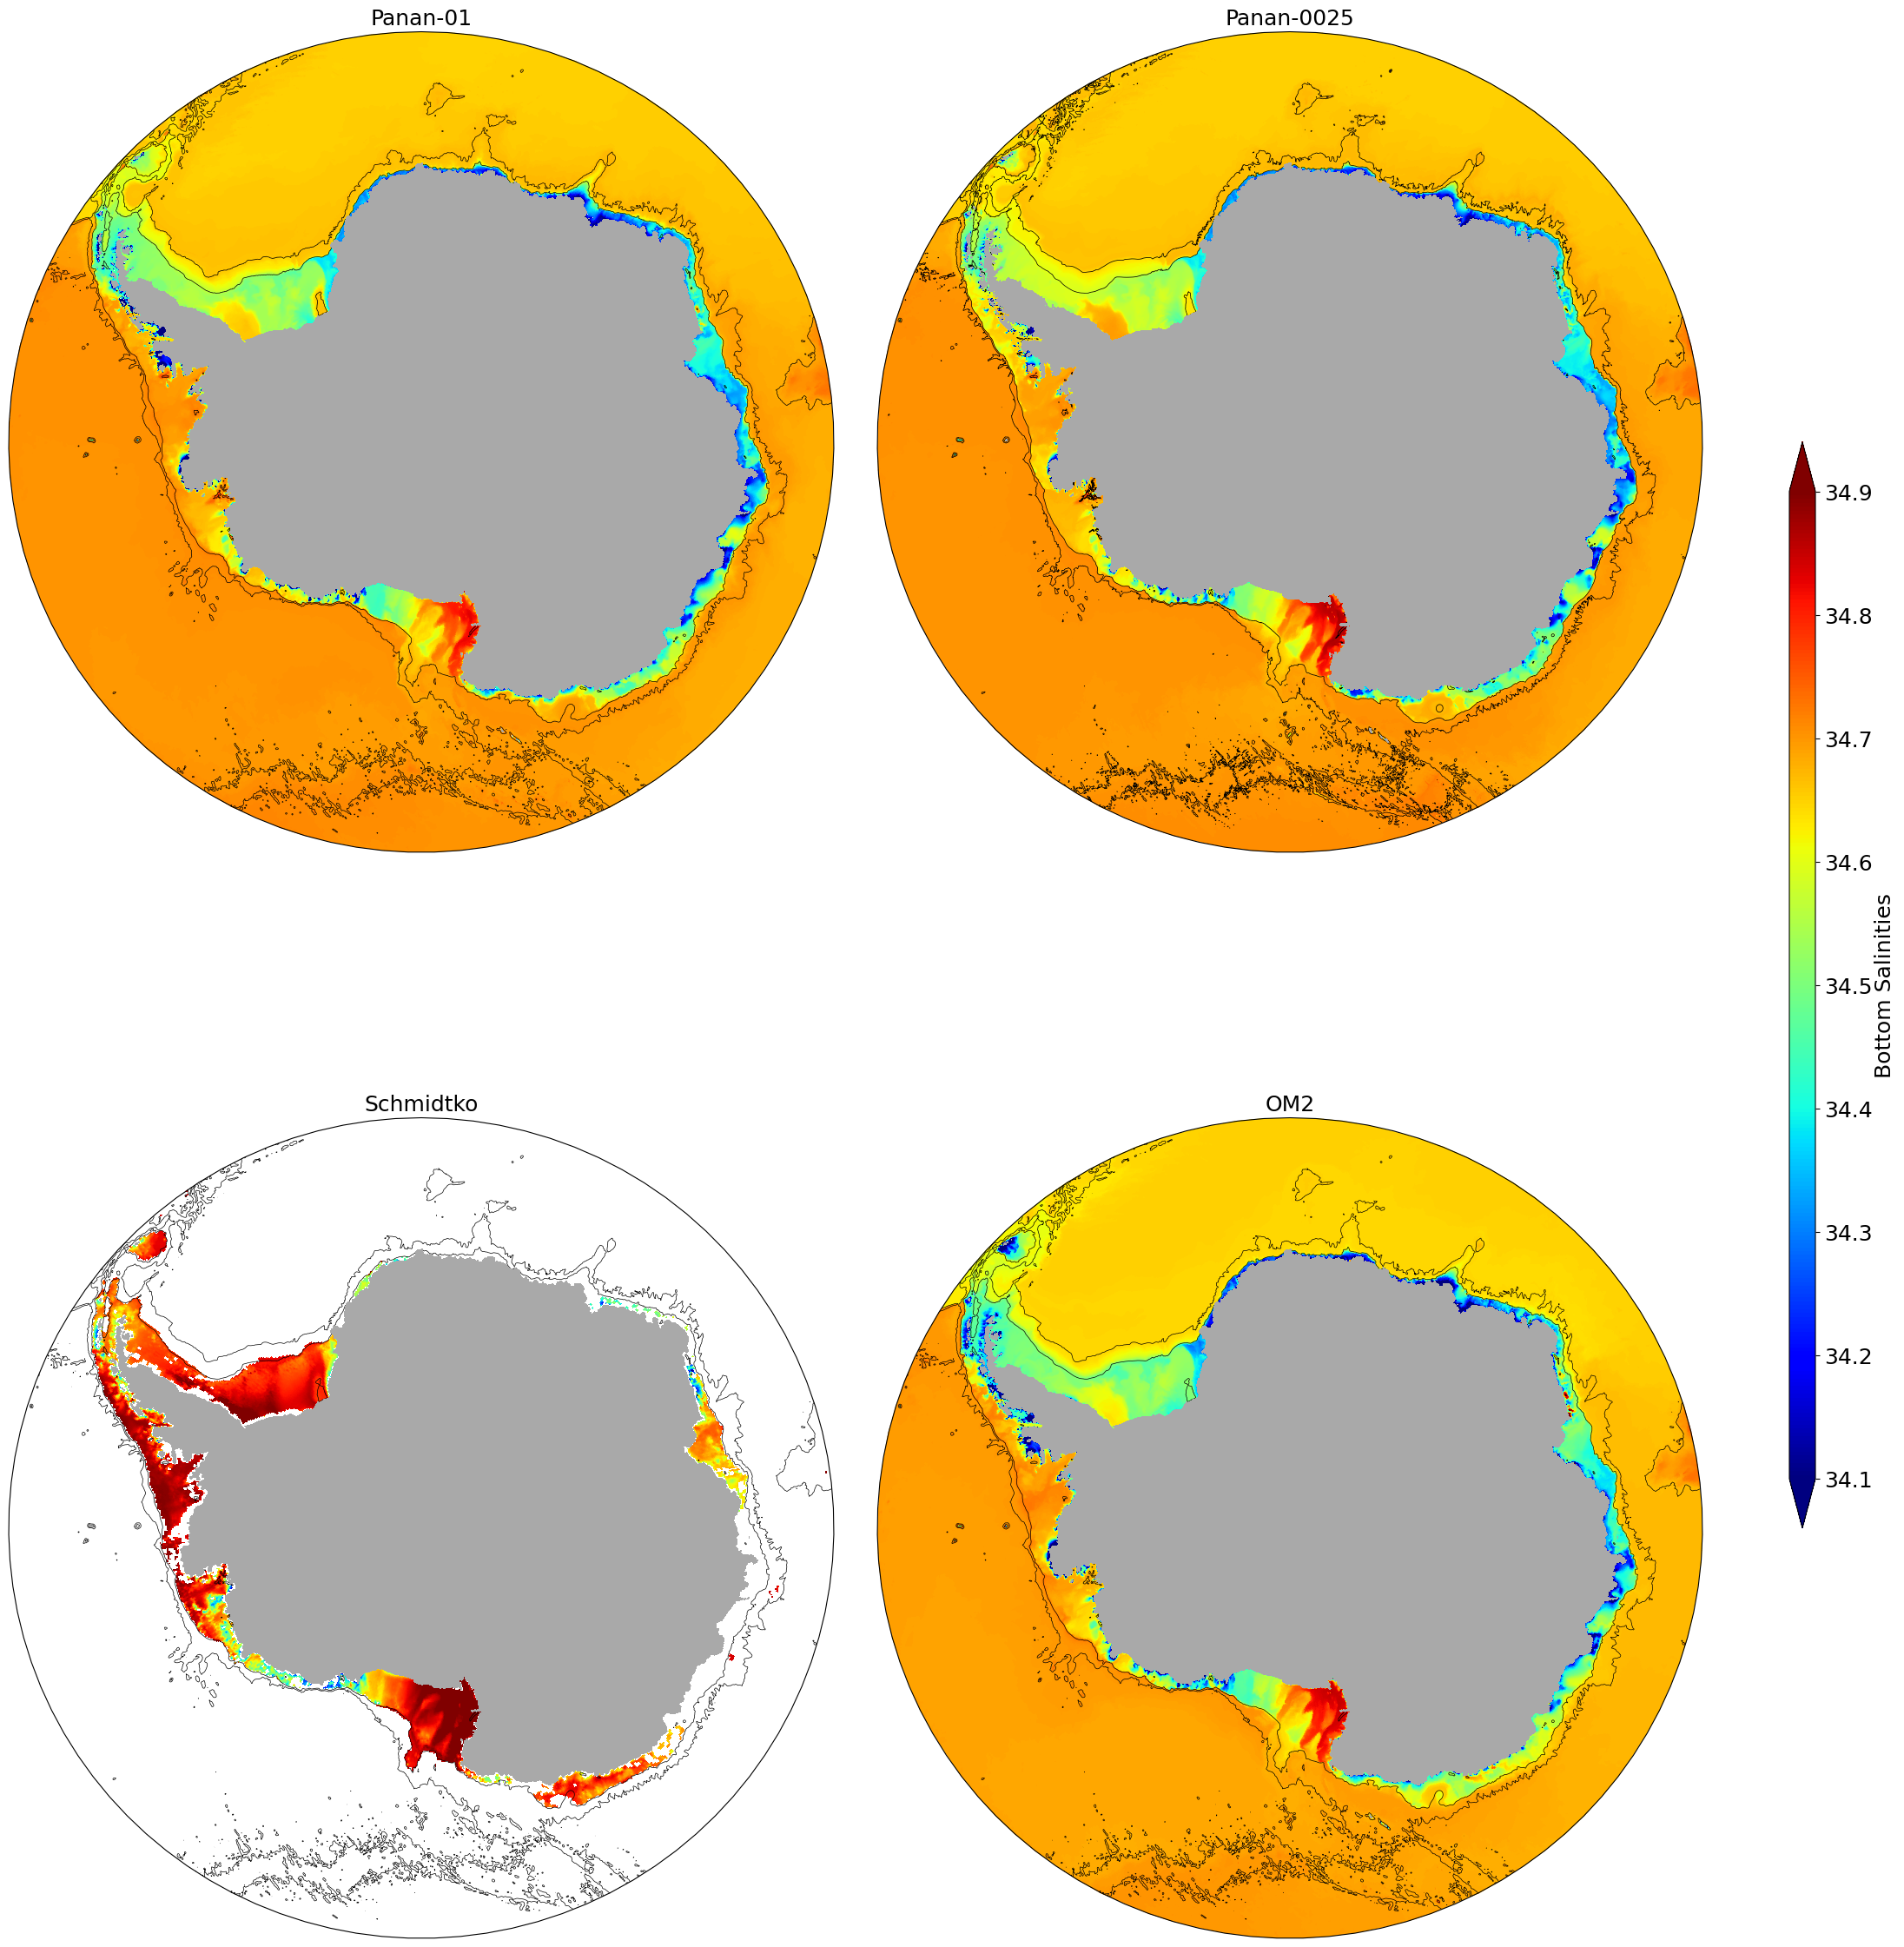

In [24]:
# Actual temperatures  to Schmidtko:

scale_max = 1
fontsize=18
#levels=np.arange(-3,2.005,.05)


fig  = plt.figure(1, figsize = (25,25))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Obs
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_OM2.xt_ocean, sob_OM2.yt_ocean, salt_Schmidtko_OM2, vmin=34.1,vmax=34.9,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Schmidtko',fontsize=fontsize)
ax.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())




# OM2
ax = fig.add_axes([0.4, 0.0, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_OM2.xt_ocean, sob_OM2.yt_ocean, sob_OM2, vmin=34.1,vmax=34.9,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('OM2',fontsize=fontsize)
ax.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())




# panan01
ax = fig.add_axes([0, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_01.xh, sob_01.yh, sob_01, vmin=34.1,vmax=34.9,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_01.xh,ht_01.yh,ht_01,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-01',fontsize=fontsize)
ax.contourf(ht_01.xh, land_mask_lat_01,land_mask_masked_01,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())





# panan0025
ax = fig.add_axes([0.4, 0.5, 0.38, 0.5],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_0025.xh, sob_0025.yh, sob_0025, vmin=34.1,vmax=34.9,
                   cmap = 'jet', transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Panan-0025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())



# colorbar:
cbaxes = fig.add_axes([0.82, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom Salinities',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

plt.savefig(figpath+'Panan_bottomS.png',dpi=300)

Next step: Plot the difference between panan-01, panan005 and panan0025. For that you will need to interpolate the first ones into the grid of the last one

In [43]:
# interpolate panan at low resolution to higher resolutions 
def interp_panan(source_data,model_lat,model_lon): 
    new_regridded = source_data.interp(yh = model_lat, xh = model_lon)
    return new_regridded


In [44]:
%%time
tob_01to0025 = interp_panan(tob_01,tob_0025.yh,tob_0025.xh)
sob_01to0025 = interp_panan(sob_01,tob_0025.yh,tob_0025.xh)

tob_005to0025 = interp_panan(tob_005,tob_0025.yh,tob_0025.xh)
sob_005to0025 = interp_panan(sob_005,tob_0025.yh,tob_0025.xh)

CPU times: user 2.04 s, sys: 1.37 s, total: 3.41 s
Wall time: 3.02 s


In [45]:
%%time
tob_01to0025 = tob_01to0025.load()
sob_01to0025 = sob_01to0025.load()

CPU times: user 213 µs, sys: 161 µs, total: 374 µs
Wall time: 386 µs


In [46]:
%%time
tob_005to0025 = tob_005to0025.load()
sob_005to0025 = sob_005to0025.load()

CPU times: user 263 µs, sys: 104 µs, total: 367 µs
Wall time: 379 µs


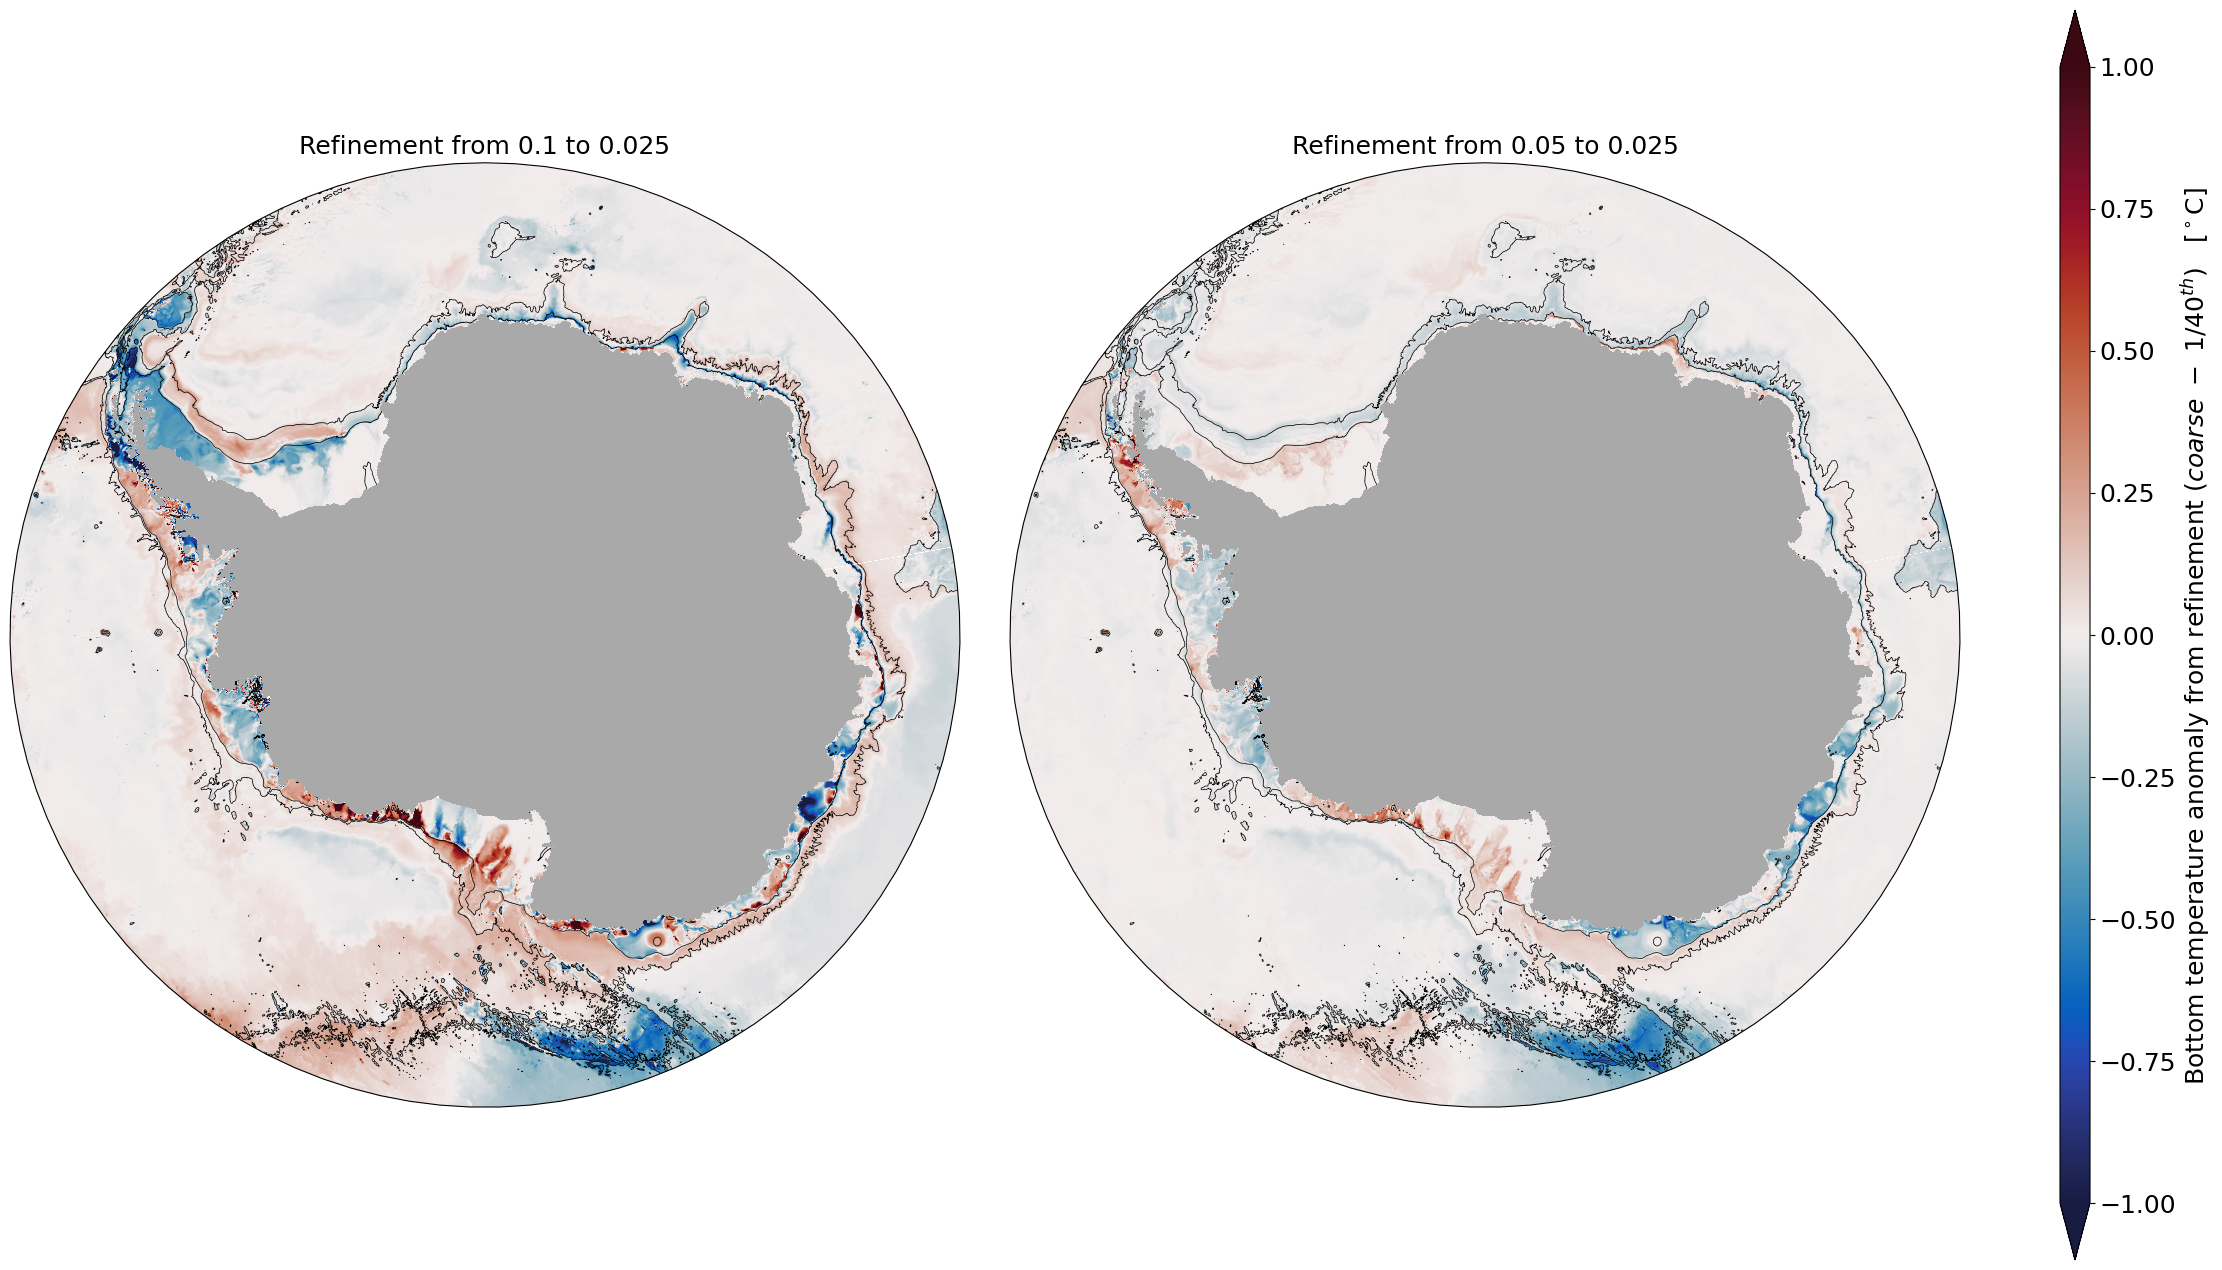

In [62]:
# Bottom temperature comparisson  as grid refines:

scale_max = 1
fontsize=18

fig  = plt.figure(1, figsize = (25,25))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)


# panan0.1 - panan0025
# setup stereo projection:
ax = fig.add_axes([0, 0, 0.38, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_0025.xh, tob_0025.yh, tob_01to0025-tob_0025, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Refinement from 0.1 to 0.025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


ax = fig.add_axes([0.4, 0, 0.38, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(tob_0025.xh, tob_0025.yh, tob_005to0025-tob_0025, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Refinement from 0.05 to 0.025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


# colorbar:
cbaxes = fig.add_axes([0.82, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom temperature anomaly from refinement $(coarse\  - \  1/40^{th})$   [$^\circ$C] ',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

plt.savefig(figpath+'Panan_bottomT_resolution_comparisson.png',dpi=300)

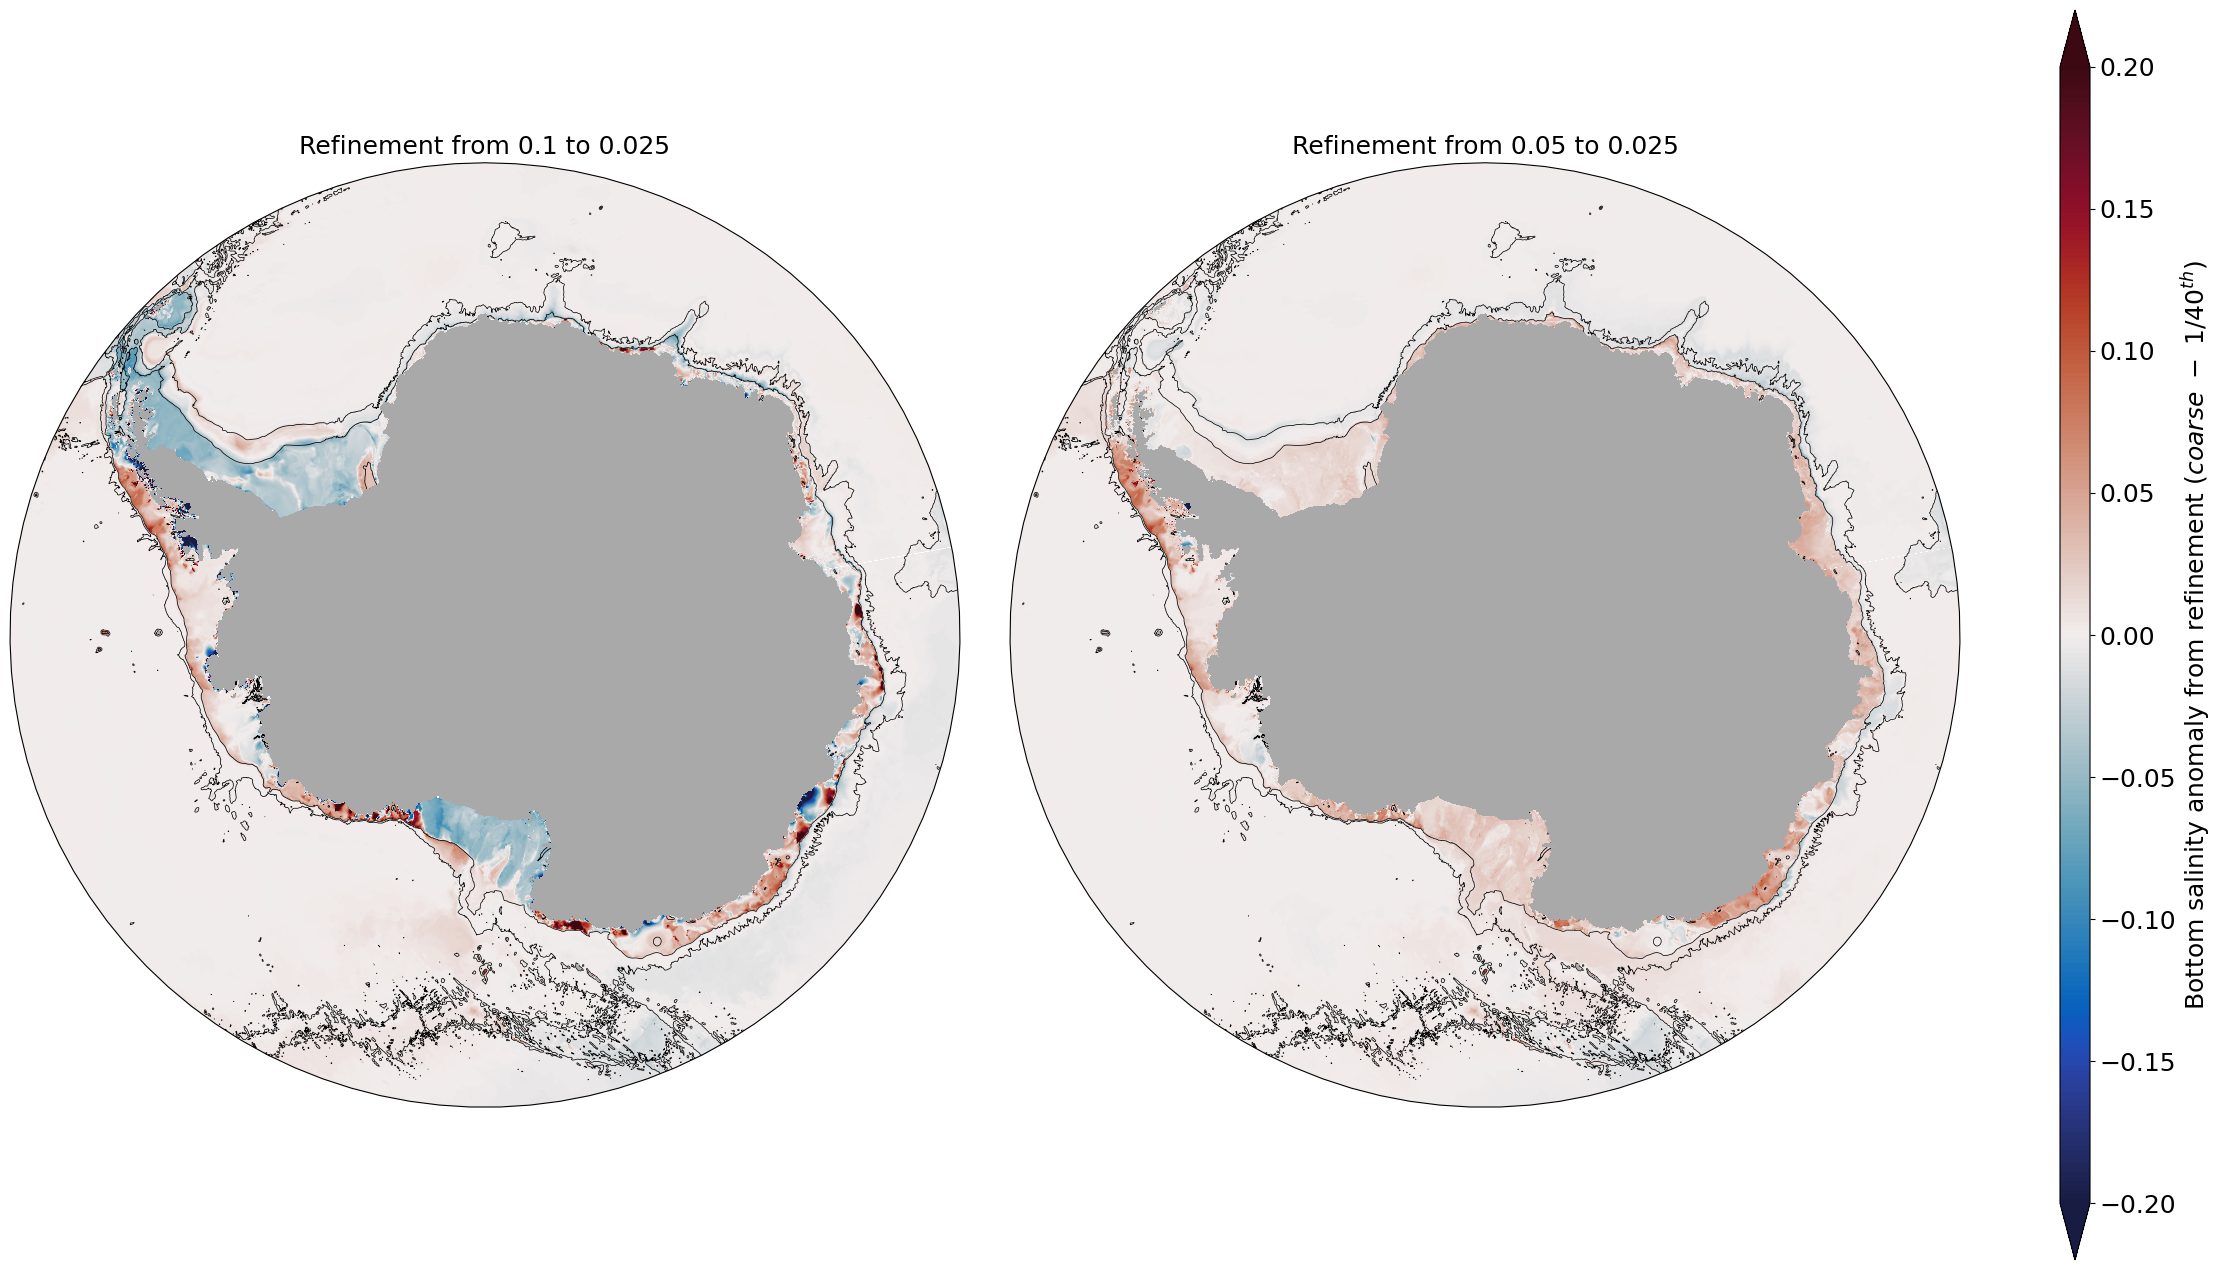

In [58]:
# Bottom salinity comparisson  as grid refines:

scale_max = 0.2
fontsize=18

fig  = plt.figure(1, figsize = (25,25))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)


# panan0.1 - panan0025
# setup stereo projection:
ax = fig.add_axes([0, 0, 0.38, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_0025.xh, sob_0025.yh, sob_01to0025-sob_0025, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Refinement from 0.1 to 0.025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


ax = fig.add_axes([0.4, 0, 0.38, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(sob_0025.xh, sob_0025.yh, sob_005to0025-sob_0025, norm = norm, 
                   cmap = cmocean.balance, transform = ccrs.PlateCarree())
ax.contour(ht_0025.xh,ht_0025.yh,ht_0025,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Refinement from 0.05 to 0.025',fontsize=fontsize)
ax.contourf(ht_0025.xh, land_mask_lat_0025,land_mask_masked_0025,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


# colorbar:
cbaxes = fig.add_axes([0.82, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Bottom salinity anomaly from refinement ($coarse\ - \ 1/40^{th}$)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

plt.savefig(figpath+'Panan_bottomS_resolution_comparisson.png',dpi=300)